# Data Cleaning and Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
market_df = pd.read_csv('Market_Fact.csv')

In [3]:
market_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [4]:
market_df.tail()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
8394,Ord_5353,Prod_4,SHP_7479,Cust_1798,2841.4395,0.08,28,374.63,7.69,0.59
8395,Ord_5411,Prod_6,SHP_7555,Cust_1798,127.1600,0.10,20,-74.03,6.92,0.37
8396,Ord_5388,Prod_6,SHP_7524,Cust_1798,243.0500,0.02,39,-70.85,5.35,0.40
8397,Ord_5348,Prod_15,SHP_7469,Cust_1798,3872.8700,0.03,23,565.34,30.00,0.62
8398,Ord_5459,Prod_6,SHP_7628,Cust_1798,603.6900,0.00,47,131.39,4.86,0.38


In [5]:
market_df.shape

(8399, 10)

In [10]:
market_df.sample()# Generates random row(by default 1 row)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
1319,Ord_294,Prod_4,SHP_396,Cust_105,8551.544,0.03,49,2763.13,8.99,0.58


In [11]:
market_df.sample(3)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
1806,Ord_4769,Prod_15,SHP_6652,Cust_1628,2379.15,0.06,18,-261.77,30.00,0.78
2631,Ord_1505,Prod_14,SHP_2081,Cust_518,9862.51,0.07,15,325.29,24.49,0.54
3457,Ord_776,Prod_8,SHP_1064,Cust_261,73.64,0.07,44,-58.87,1.99,0.51


In [13]:
type(market_df.shape)

tuple

In [15]:
market_df.shape[0]

8399

In [17]:
market_df.columns[0]

'Ord_id'

In [18]:
market_df.index

RangeIndex(start=0, stop=8399, step=1)

In [19]:
market_df.dtypes

Ord_id                  object
Prod_id                 object
Ship_id                 object
Cust_id                 object
Sales                  float64
Discount               float64
Order_Quantity           int64
Profit                 float64
Shipping_Cost          float64
Product_Base_Margin    float64
dtype: object

In [22]:
print(market_df.dtypes[0])
print(market_df.dtypes['Ord_id'])
print(market_df['Ord_id'].dtypes)

object
object
object


In [23]:
market_df.isnull().sum()

Ord_id                  0
Prod_id                 0
Ship_id                 0
Cust_id                 0
Sales                   0
Discount                0
Order_Quantity          0
Profit                  0
Shipping_Cost           0
Product_Base_Margin    63
dtype: int64

In [26]:
m = market_df['Product_Base_Margin'].mean()
m

0.5125131957773527

### Replace "null" values with "mean" value

In [27]:
market_df['Product_Base_Margin'].fillna(m, inplace = True)

In [28]:
market_df.isnull().sum()

Ord_id                 0
Prod_id                0
Ship_id                0
Cust_id                0
Sales                  0
Discount               0
Order_Quantity         0
Profit                 0
Shipping_Cost          0
Product_Base_Margin    0
dtype: int64

In [30]:
type(market_df['Sales'])

pandas.core.series.Series

In [32]:
type(market_df[['Sales']])

pandas.core.frame.DataFrame

In [33]:
market_df.describe()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513
std,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135079
min,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000
25%,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000
50%,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000
75%,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000
max,89061.050000,0.250000,50.000000,27220.690000,164.730000,0.850000


In [35]:
market_df.describe(include = object)# it includes categorical(object or string) columns

,Ord_id,Prod_id,Ship_id,Cust_id
count,8399,8399,8399,8399
unique,5506,17,7701,1832
top,Ord_542,Prod_6,SHP_5602,Cust_1140
freq,6,1225,4,30


In [38]:
print(market_df.columns[market_df.dtypes == object])
print(market_df.columns[market_df.dtypes == np.float64])
print(market_df.columns[market_df.dtypes != object])

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id'], dtype='object')
Index(['Sales', 'Discount', 'Profit', 'Shipping_Cost', 'Product_Base_Margin'], dtype='object')
Index(['Sales', 'Discount', 'Order_Quantity', 'Profit', 'Shipping_Cost',
       'Product_Base_Margin'],
      dtype='object')


## Slicing

In [40]:
market_df.head(10)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.37
6,Ord_31,Prod_12,SHP_41,Cust_26,14.7600,0.01,5,1.32,0.50,0.36
7,Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55
8,Ord_4725,Prod_13,SHP_6593,Cust_1641,162.0000,0.01,33,45.84,0.71,0.52
9,Ord_4725,Prod_6,SHP_6593,Cust_1641,57.2200,0.07,8,-27.72,6.60,0.37


In [41]:
market_df.iloc[9,3:7]

Cust_id           Cust_1641
Sales                 57.22
Discount               0.07
Order_Quantity            8
Name: 9, dtype: object

In [42]:
market_df.iloc[9:10,3:7]

,Cust_id,Sales,Discount,Order_Quantity
9,Cust_1641,57.22,0.07,8


In [43]:
market_df.iloc[5:10]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.37
6,Ord_31,Prod_12,SHP_41,Cust_26,14.7600,0.01,5,1.32,0.50,0.36
7,Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55
8,Ord_4725,Prod_13,SHP_6593,Cust_1641,162.0000,0.01,33,45.84,0.71,0.52
9,Ord_4725,Prod_6,SHP_6593,Cust_1641,57.2200,0.07,8,-27.72,6.60,0.37


In [45]:
market_df.loc[5:10,['Sales','Profit']]

,Sales,Profit
5,164.0200,-47.64
6,14.7600,1.32
7,3410.1575,1137.91
8,162.0000,45.84
9,57.2200,-27.72
10,4072.0100,1675.98


In [46]:
new_data = market_df.set_index('Ord_id')

In [49]:
new_data.head(10)

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56
Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54
Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59
Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37
Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38
Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.37
Ord_31,Prod_12,SHP_41,Cust_26,14.7600,0.01,5,1.32,0.50,0.36
Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55
Ord_4725,Prod_13,SHP_6593,Cust_1641,162.0000,0.01,33,45.84,0.71,0.52


In [63]:
new_data.loc[['Ord_4725','Ord_5446']]

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55
Ord_4725,Prod_13,SHP_6593,Cust_1641,162.0000,0.01,33,45.84,0.71,0.52
Ord_4725,Prod_6,SHP_6593,Cust_1641,57.2200,0.07,8,-27.72,6.60,0.37
Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56
Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59
Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.37


In [65]:
m2 = market_df.Product_Base_Margin.isnull()
market_df[m2]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin


In [68]:
market_df[market_df.Sales > 10000]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
17,Ord_4471,Prod_15,SHP_6228,Cust_1521,13255.930,0.02,25,4089.27,26.00,0.600000
84,Ord_5232,Prod_17,SHP_7306,Cust_1758,21366.510,0.00,3,-11984.40,24.49,0.390000
121,Ord_5423,Prod_17,SHP_7577,Cust_1800,13070.200,0.07,4,-6923.60,8.73,0.570000
133,Ord_2432,Prod_3,SHP_3338,Cust_933,15337.580,0.10,30,6670.41,19.99,0.370000
165,Ord_4702,Prod_3,SHP_6560,Cust_1603,11823.520,0.10,34,4592.74,19.99,0.400000
189,Ord_2831,Prod_3,SHP_3893,Cust_1036,18092.660,0.09,36,7917.76,19.99,0.370000
191,Ord_2791,Prod_11,SHP_3838,Cust_1036,10351.010,0.08,19,-1331.55,45.70,0.710000
197,Ord_2753,Prod_3,SHP_3778,Cust_997,23106.460,0.08,28,9527.47,19.99,0.380000
199,Ord_2799,Prod_15,SHP_3850,Cust_997,11002.660,0.07,46,2349.29,43.32,0.550000
385,Ord_3707,Prod_17,SHP_5136,Cust_1307,28359.400,0.05,49,14440.39,24.49,0.370000


In [69]:
market_df[['Sales','Profit']][market_df.Sales > 10000]

,Sales,Profit
17,13255.930,4089.27
84,21366.510,-11984.40
121,13070.200,-6923.60
133,15337.580,6670.41
165,11823.520,4592.74
189,18092.660,7917.76
191,10351.010,-1331.55
197,23106.460,9527.47
199,11002.660,2349.29
385,28359.400,14440.39


## Merging multiple datasets

In [70]:
market_df = pd.read_csv('Market_Fact.csv')
Order_df = pd.read_csv('Order_dim.csv')
Product_df = pd.read_csv('Prod_dim.csv')
Shipping_df = pd.read_csv('Shipping_dim.csv')
Customer_df = pd.read_csv('Cust_dimen.csv')

In [72]:
print('Market',market_df.shape)
print('Order',Order_df.shape)
print('Product',Product_df.shape)
print('Shipping',Shipping_df.shape)
print('Custmer',Customer_df.shape)

Market (8399, 10)
Order (5506, 4)
Product (17, 3)
Shipping (7701, 4)
Custmer (1832, 5)


In [73]:
print(market_df.columns)
print(Product_df.columns)

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin'],
      dtype='object')
Index(['Product_Category', 'Product_Sub_Category', 'Prod_id'], dtype='object')


In [74]:
# Merging market_df and Product_df based on 
# common column name("Prod_id")
df1 = pd.merge(market_df,Product_df, on = 'Prod_id')

In [75]:
df1.shape

(8399, 12)

In [76]:
df1.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


In [77]:
print(df1.columns)
print(Customer_df.columns)

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin',
       'Product_Category', 'Product_Sub_Category'],
      dtype='object')
Index(['Customer_Name', 'Province', 'Region', 'Customer_Segment', 'Cust_id'], dtype='object')


In [78]:
df2 = pd.merge(df1,Customer_df,on = 'Cust_id')

In [80]:
df2.shape

(8399, 16)

In [82]:
df2.head(3)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,TECHNOLOGY,TELEPHONES AND COMMUNICATION,AARON BERGMAN,ALBERTA,WEST,CORPORATE


In [84]:
print(df2.columns)
Order_df.columns

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin',
       'Product_Category', 'Product_Sub_Category', 'Customer_Name', 'Province',
       'Region', 'Customer_Segment'],
      dtype='object')


Index(['Order_ID', 'Order_Date', 'Order_Priority', 'Ord_id'], dtype='object')

In [85]:
df3 = pd.merge(df2,Order_df,on = 'Ord_id')

In [86]:
df3.shape

(8399, 19)

In [87]:
master_df = pd.merge(df3,Shipping_df,on = 'Ship_id')

In [88]:
master_df.shape

(8399, 22)

In [90]:
master_df.columns

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin',
       'Product_Category', 'Product_Sub_Category', 'Customer_Name', 'Province',
       'Region', 'Customer_Segment', 'Order_ID_x', 'Order_Date',
       'Order_Priority', 'Order_ID_y', 'Ship_Mode', 'Ship_Date'],
      dtype='object')

In [91]:
master_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,...,Customer_Name,Province,Region,Customer_Segment,Order_ID_x,Order_Date,Order_Priority,Order_ID_y,Ship_Mode,Ship_Date
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,36262,27-07-2010,NOT SPECIFIED,36262,REGULAR AIR,28-07-2010
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,36262,27-07-2010,NOT SPECIFIED,36262,EXPRESS AIR,27-07-2010
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,36262,27-07-2010,NOT SPECIFIED,36262,EXPRESS AIR,28-07-2010
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,20513,07-07-2009,HIGH,20513,EXPRESS AIR,08-07-2009
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,39682,09-11-2010,MEDIUM,39682,EXPRESS AIR,11-11-2010


In [92]:
master_df.isnull().sum()

Ord_id                   0
Prod_id                  0
Ship_id                  0
Cust_id                  0
Sales                    0
Discount                 0
Order_Quantity           0
Profit                   0
Shipping_Cost            0
Product_Base_Margin     63
Product_Category         0
Product_Sub_Category     0
Customer_Name            0
Province                 0
Region                   0
Customer_Segment         0
Order_ID_x               0
Order_Date               0
Order_Priority           0
Order_ID_y               0
Ship_Mode                0
Ship_Date                0
dtype: int64

In [94]:
mean_val = master_df['Product_Base_Margin'].mean()

In [95]:
master_df['Product_Base_Margin'].fillna(mean_val,inplace = True)

In [96]:
master_df.isnull().sum()

Ord_id                  0
Prod_id                 0
Ship_id                 0
Cust_id                 0
Sales                   0
Discount                0
Order_Quantity          0
Profit                  0
Shipping_Cost           0
Product_Base_Margin     0
Product_Category        0
Product_Sub_Category    0
Customer_Name           0
Province                0
Region                  0
Customer_Segment        0
Order_ID_x              0
Order_Date              0
Order_Priority          0
Order_ID_y              0
Ship_Mode               0
Ship_Date               0
dtype: int64

## Dataset Description
- Pclass : Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- survival : Survival (0 = No; 1 = Yes)
- name : Name
- sex : Gender(M/F)
- age : Age
- sibsp : Number of Siblings/Spouses Aboard
- parch : Number of Parents/Children Aboard
- ticket : Ticket Number
- fare : Passenger Fare (British pound)
- cabin : Cabin
- embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


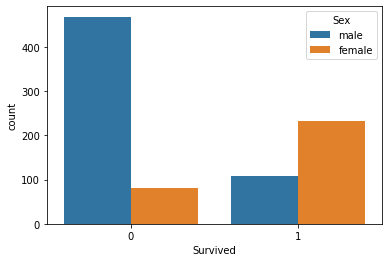

In [4]:
sns.countplot(x = 'Survived',hue = 'Sex',data = df)

In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
new_df = df.drop('Cabin',axis = 1)

In [8]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


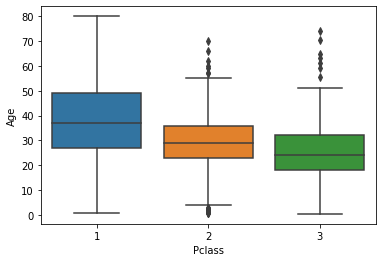

In [9]:
sns.boxplot(x = 'Pclass',y = 'Age',data = df)

In [10]:
embark = pd.get_dummies(df['Embarked'])

In [12]:
pclass = pd.get_dummies(df['Pclass'])

In [13]:
gender = pd.get_dummies(df['Sex'])

In [15]:
df = pd.concat([df,gender,embark,pclass],axis = 1)

In [17]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,0,1


In [18]:
titanic2 = new_df.drop(['PassengerId','Name','Sex','Age','Ticket','Embarked'],
                      axis = 1,inplace = True)

In [19]:
titanic2

In [21]:
titanic3 = new_df.drop(['Pclass'],axis = 1,inplace = True)

In [23]:
new_df.head()

,Survived,SibSp,Parch,Fare
0,0,1,0,7.2500
1,1,1,0,71.2833
2,1,0,0,7.9250
3,1,1,0,53.1000
4,0,0,0,8.0500


In [24]:
X = new_df.drop('Survived',axis = 1)
Y = new_df['Survived']

In [26]:
from sklearn.model_selection import train_test_split
X_trai,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 1)

In [28]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_reg = LogisticRegression()
log_reg.fit(X_trai,Y_train)
y_pred = log_reg.predict(X_test)

C:\Users\Mouni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print('Confusion Matrix :')
print(confusion_matrix(Y_test,y_pred))
print('\n')
print('Classification Report :')
print(classification_report(Y_test,y_pred))

Confusion Matrix :
[[119   9]
 [ 77  18]]


Classification Report :
              precision    recall  f1-score   support

           0       0.61      0.93      0.73       128
           1       0.67      0.19      0.30        95

    accuracy                           0.61       223
   macro avg       0.64      0.56      0.51       223
weighted avg       0.63      0.61      0.55       223



In [ ]:
from sklearn.metrics import accuracy_score
print('Titanic Dataset Accuracy')
print(accuracy_score(Y_test,y_pred))